# Airbnb Price Analysis
## 1. Introduction

This project focuses on predicting Airbnb prices using various machine learning models. The goal is to build a pricing model that helps optimize Airbnb listings' revenue.

### Objectives:

Understand key factors influencing Airbnb pricing.

Develop and compare multiple predictive models.

Evaluate model performance using real-world data.

Assess external validity by testing models on different datasets.

The dataset was sourced from Inside Airbnb, focusing on Istanbul (Q4) as the primary dataset. Istanbul (Q1) and Athens datasets are used for validation.

## 2. Data Loading and Preprocessing
### 2.1 Loading Required Libraries


In [227]:
!pip install geopy


In [228]:
!pip install xgboost


In [229]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from IPython.display import display

sns.set(style="whitegrid")

### 2.2 Dataset Paths and Loading

In [231]:
istanbul_q1_path = r"C:\Users\ASUS\Desktop\data\istanbul_q1.csv"
istanbul_q4_path = r"C:\Users\ASUS\Desktop\data\istanbul_q4.csv"
athens_path = r"C:\Users\ASUS\Desktop\data\athens.csv"

istanbul_q1 = pd.read_csv(istanbul_q1_path)
istanbul_q4 = pd.read_csv(istanbul_q4_path)
athens = pd.read_csv(athens_path)

In [232]:
print(f"Istanbul Q1 Coloumn Number: {istanbul_q1.shape[0]}")
print(f"Istanbul Q4 Coloumn Number: {istanbul_q4.shape[0]}")
print(f"Athens Coloumn Number: {athens.shape[0]}")

Istanbul Q1 Coloumn Number: 34446
Istanbul Q4 Coloumn Number: 29400
Athens Coloumn Number: 14642


In [233]:
print("Coloumns: Istanbul Q1")
print(istanbul_q1.columns.tolist())

print("Coloumns: Istanbul Q4")
print(istanbul_q4.columns.tolist())

print("Coloumns: Athens")
print(athens.columns.tolist())



Coloumns: Istanbul Q1
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availa

In [234]:
print("Displaying: Istanbul Q1")
display(istanbul_q1.head())

print("Displaying: Istanbul Q4")
display(istanbul_q4.head())

print("Displaying: Athens")
display(athens.head())

Displaying: Istanbul Q1


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,25436,https://www.airbnb.com/rooms/25436,20240331032523,2024-03-31,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Bebek Koru. If you want villag...,NaN,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,28318,https://www.airbnb.com/rooms/28318,20240331032523,2024-03-31,city scrape,Cosy home overlooking Bosphorus,NaN,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,34177,https://www.airbnb.com/rooms/34177,20240331032523,2024-03-31,city scrape,PETIT HOUSE,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,...,4.81,4.69,4.81,NaN,f,2,2,0,0,0.16
3,701899,https://www.airbnb.com/rooms/701899,20240331032523,2024-03-31,city scrape,"Artist's Studio, Central & Near Taksim",Designed by a tasteful architect and located o...,"It is perfectly located in Harbiye, which is o...",https://a0.muscache.com/pictures/d3917838-da5f...,3195183,...,4.96,4.88,4.77,NaN,t,8,8,0,0,1.96
4,42835,https://www.airbnb.com/rooms/42835,20240331032523,2024-03-31,city scrape,Cozy apartment in the heart of Istanbul,Welcome to our cozy 2-bedroom apartment locate...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,187026,...,NaN,NaN,NaN,NaN,f,3,1,2,0,NaN


Displaying: Istanbul Q4


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,25436,https://www.airbnb.com/rooms/25436,20241230155630,2024-12-30,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Baby Koru. If you want village...,Clean and elegand friends . U can find everyth...,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,34177,https://www.airbnb.com/rooms/34177,20241230155630,2024-12-31,city scrape,PETIT HOUSE,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,...,4.81,4.69,4.81,NaN,f,2,2,0,0,0.15
2,42835,https://www.airbnb.com/rooms/42835,20241230155630,2024-12-30,previous scrape,Cozy apartment in the heart of Istanbul,Welcome to our cozy 2-bedroom apartment locate...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,187026,...,NaN,NaN,NaN,NaN,f,3,1,2,0,NaN
3,73477,https://www.airbnb.com/rooms/73477,20241230155630,2024-12-31,city scrape,Sea View Apartment in Taksim/ Center of Istanbul,Sea View Apartment in Taksim/ Center of Istanbul,Gumussuyu,https://a0.muscache.com/pictures/409813ff-21c0...,383789,...,5.00,5.00,4.91,NaN,f,2,2,0,0,0.31
4,170150,https://www.airbnb.com/rooms/170150,20241230155630,2024-12-31,city scrape,Lovely Gardened House 10 minutes walking to metro,It is a private small cottage in a lovely lush...,NaN,https://a0.muscache.com/pictures/041cc569-4204...,810759,...,4.95,4.71,4.86,NaN,f,2,2,0,0,0.64


Displaying: Athens


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27262,https://www.airbnb.com/rooms/27262,20241225065837,2024-12-25,city scrape,"AQA-No7, Great mattress, high speed internet",THE MATTRESS - KING KOIL - Camden Luxury 160x2...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,37177,...,4.97,4.75,4.71,00002433111,t,1,1,0,0,0.19
1,809874,https://www.airbnb.com/rooms/809874,20241225065837,2024-12-25,city scrape,Wonderfull Penthouse!!,NaN,NaN,https://a0.muscache.com/pictures/11813063/7d06...,4259738,...,4.92,4.86,4.91,00001240742,f,1,1,0,0,0.68
2,866381,https://www.airbnb.com/rooms/866381,20241225065837,2024-12-25,city scrape,Acropolis View Funky House,Welcome to a colorful 7th-floor penthouse in N...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,4551671,...,4.93,4.73,4.90,00002608390,f,1,1,0,0,0.28
3,886724,https://www.airbnb.com/rooms/886724,20241225065837,2024-12-25,city scrape,Luxury Boutique Appartment -Athens,NaN,The apartment is very conveniently located for...,https://a0.muscache.com/pictures/14659524/b33a...,4700824,...,4.89,4.28,4.72,00000052101,f,1,1,0,0,0.14
4,896212,https://www.airbnb.com/rooms/896212,20241225065837,2024-12-25,city scrape,Living like in a cottage in the center of Athens,An oasis of calm in the centre of a crowded ci...,Exarchia is considered the bohemian and altern...,https://a0.muscache.com/pictures/prohost-api/H...,4777984,...,4.93,4.82,4.93,00000206136,t,13,13,0,0,3.58


In [236]:
print("\nMissing Values in Istanbul Q1:")
display(istanbul_q1.isnull().sum()[istanbul_q1.isnull().sum() > 0])

print("\nMissing Values in Istanbul Q4:")
display(istanbul_q4.isnull().sum()[istanbul_q4.isnull().sum() > 0])

print("\nMissing Values in Athens:")
display(athens.isnull().sum()[athens.isnull().sum() > 0])



Missing Values in Istanbul Q1:


description                      1144
neighborhood_overview           22508
host_location                   11955
host_about                      20935
host_response_time               5658
host_response_rate               5658
host_acceptance_rate             6098
host_is_superhost                  40
host_neighbourhood              30463
neighbourhood                   22508
neighbourhood_group_cleansed    34446
bathrooms                        1947
bathrooms_text                     81
bedrooms                          327
beds                             2009
price                            1891
minimum_minimum_nights              1
maximum_minimum_nights              1
minimum_maximum_nights              1
maximum_maximum_nights              1
minimum_nights_avg_ntm              1
maximum_nights_avg_ntm              1
calendar_updated                34446
has_availability                  748
first_review                    13962
last_review                     13962
review_score


Missing Values in Istanbul Q4:


description                       885
neighborhood_overview           20532
picture_url                         1
host_location                    9994
host_about                      17781
host_response_time               9571
host_response_rate               9571
host_acceptance_rate             5011
host_is_superhost                 697
host_neighbourhood              25598
neighbourhood                   20532
neighbourhood_group_cleansed    29400
bathrooms                        4321
bathrooms_text                    113
bedrooms                          713
beds                             4309
price                            4245
minimum_minimum_nights              5
maximum_minimum_nights              5
minimum_maximum_nights              5
maximum_maximum_nights              5
minimum_nights_avg_ntm              5
maximum_nights_avg_ntm              5
calendar_updated                29400
has_availability                  597
first_review                    11320
last_review 


Missing Values in Athens:


description                       294
neighborhood_overview            6944
host_location                    4493
host_about                       7297
host_response_time               1739
host_response_rate               1739
host_acceptance_rate              831
host_is_superhost                 774
host_neighbourhood               8889
neighbourhood                    6944
neighbourhood_group_cleansed    14642
bathrooms                         925
bathrooms_text                      9
bedrooms                           83
beds                              949
price                             920
calendar_updated                14642
has_availability                   74
first_review                     2313
last_review                      2313
review_scores_rating             2313
review_scores_accuracy           2313
review_scores_cleanliness        2313
review_scores_checkin            2313
review_scores_communication      2313
review_scores_location           2313
review_score

In [237]:
def clean_price(df):
    df['price'] = df['price'].astype(str).replace(r'[\$,€₺]', '', regex=True)
    df['price'] = df['price'].str.replace(',', '').astype(float)
    df['log_price'] = np.log1p(df['price'])
    return df

In [238]:
def clean_bathrooms(df):
    if 'bathrooms_text' in df.columns:
        df['bathrooms_text'] = df['bathrooms_text'].astype(str).str.extract(r'(\d+\.?\d*)')
        df['bathrooms_text'] = pd.to_numeric(df['bathrooms_text'], errors='coerce')
    return df

In [239]:
def fill_missing_values(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].median())
    for col in categorical_cols:
        df[col] = df[col].fillna("Unknown")
    return df

### 2.3 Feature Engineering

In [241]:
def feature_engineering(df):
    if 'neighbourhood' in df.columns:
        df['neighbourhood_avg_price'] = df.groupby("neighbourhood")['price'].transform('mean')
        df['neighbourhood_avg_reviews'] = df.groupby("neighbourhood")['reviews_per_month'].transform('mean')

    if 'first_review' in df.columns and 'last_scraped' in df.columns:
        df['first_review'] = pd.to_datetime(df['first_review'], format='%Y-%m-%d', errors='coerce')
        df['last_scraped'] = pd.to_datetime(df['last_scraped'], format='%Y-%m-%d', errors='coerce')
        df['days_since_listed'] = (df['last_scraped'] - df['first_review']).dt.days
        df['days_since_listed'] = df['days_since_listed'].fillna(df['days_since_listed'].median())

    df['price_per_bedroom'] = np.log1p(df['price'] / (df['bedrooms'] + 1))
    df['price_per_accommodate'] = np.log1p(df['price'] / (df['accommodates'] + 1))

    df['availability_ratio'] = df['availability_365'] / 365  
    df['host_experience_years'] = 2025 - pd.to_datetime(df['host_since'], errors='coerce').dt.year
    df['amenities_count'] = df['amenities'].apply(lambda x: len(str(x).split(',')))
    df['is_entire_home'] = (df['room_type'] == 'Entire home/apt').astype(int)
    df['is_shared_room'] = (df['room_type'] == 'Shared room').astype(int)
    return df


In [242]:
def preprocess_airbnb_data(df, name):
    df.name = name
    df = clean_price(df)
    df = clean_bathrooms(df)
    df = fill_missing_values(df)
    df = feature_engineering(df)
    return df

istanbul_q1 = preprocess_airbnb_data(istanbul_q1, "istanbul")
istanbul_q4 = preprocess_airbnb_data(istanbul_q4, "istanbul")
athens = preprocess_airbnb_data(athens, "athens")

In [243]:
print("Displaying: Cleaned Istanbul Q1")
display(istanbul_q1.head())

print("Displaying: Cleaned Istanbul Q4")
display(istanbul_q4.head())

print("Displaying: Cleaned Athens")
display(athens.head())

print("Data preprocessing completed successfully! All datasets are now cleaned and ready for modeling.")

print("\nData preprocessing completed.")


Displaying: Cleaned Istanbul Q1


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,neighbourhood_avg_price,neighbourhood_avg_reviews,days_since_listed,price_per_bedroom,price_per_accommodate,availability_ratio,host_experience_years,amenities_count,is_entire_home,is_shared_room
0,25436,https://www.airbnb.com/rooms/25436,20240331032523,2024-03-31,previous scrape,istanbul,Our house is in Bebek Koru. If you want villag...,Unknown,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,...,2983.318065,0.822242,458.0,6.328532,6.041444,0.000000,15,67,1,0
1,28318,https://www.airbnb.com/rooms/28318,20240331032523,2024-03-31,city scrape,istanbul,Unknown,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,...,2897.079027,0.772857,458.0,7.204645,7.204645,0.221918,15,11,1,0
2,34177,https://www.airbnb.com/rooms/34177,20240331032523,2024-03-31,city scrape,istanbul,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,...,9843.076259,1.057209,3015.0,6.471573,5.779972,0.997260,15,43,1,0
3,701899,https://www.airbnb.com/rooms/701899,20240331032523,2024-03-31,city scrape,istanbul,Designed by a tasteful architect and located o...,"It is perfectly located in Harbiye, which is o...",https://a0.muscache.com/pictures/d3917838-da5f...,3195183,...,2718.523256,0.719535,4190.0,6.482343,6.077642,0.991781,13,35,1,0
4,42835,https://www.airbnb.com/rooms/42835,20240331032523,2024-03-31,city scrape,istanbul,Welcome to our cozy 2-bedroom apartment locate...,Unknown,https://a0.muscache.com/pictures/miso/Hosting-...,187026,...,2983.318065,0.822242,458.0,7.032624,6.117657,0.238356,15,51,1,0


Displaying: Cleaned Istanbul Q4


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,neighbourhood_avg_price,neighbourhood_avg_reviews,days_since_listed,price_per_bedroom,price_per_accommodate,availability_ratio,host_experience_years,amenities_count,is_entire_home,is_shared_room
0,25436,https://www.airbnb.com/rooms/25436,20241230155630,2024-12-30,previous scrape,istanbul,Our house is in Baby Koru. If you want village...,Clean and elegand friends . U can find everyth...,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,...,2400.000000,0.650000,595.0,6.685861,6.398595,0.000000,15,67,1,0
1,34177,https://www.airbnb.com/rooms/34177,20241230155630,2024-12-31,city scrape,istanbul,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,...,3916.939709,1.101975,3290.0,6.677713,5.985824,0.997260,15,43,1,0
2,42835,https://www.airbnb.com/rooms/42835,20241230155630,2024-12-30,previous scrape,istanbul,Welcome to our cozy 2-bedroom apartment locate...,Unknown,https://a0.muscache.com/pictures/miso/Hosting-...,187026,...,3615.832262,0.883154,595.0,7.090910,6.175867,0.238356,15,51,1,0
3,73477,https://www.airbnb.com/rooms/73477,20241230155630,2024-12-31,city scrape,istanbul,Sea View Apartment in Taksim/ Center of Istanbul,Gumussuyu,https://a0.muscache.com/pictures/409813ff-21c0...,383789,...,4872.462564,1.522230,1049.0,6.550366,6.145615,0.610959,14,34,1,0
4,170150,https://www.airbnb.com/rooms/170150,20241230155630,2024-12-31,city scrape,istanbul,It is a private small cottage in a lovely lush...,Unknown,https://a0.muscache.com/pictures/041cc569-4204...,810759,...,3615.832262,0.883154,4799.0,6.782759,6.090744,0.926027,14,61,1,0


Displaying: Cleaned Athens


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,neighbourhood_avg_price,neighbourhood_avg_reviews,days_since_listed,price_per_bedroom,price_per_accommodate,availability_ratio,host_experience_years,amenities_count,is_entire_home,is_shared_room
0,27262,https://www.airbnb.com/rooms/27262,20241225065837,2024-12-25,city scrape,athens,THE MATTRESS - KING KOIL - Camden Luxury 160x2...,Unknown,https://a0.muscache.com/pictures/miso/Hosting-...,37177,...,108.839862,1.431976,4478.0,4.197202,3.799228,0.972603,16,37,1,0
1,809874,https://www.airbnb.com/rooms/809874,20241225065837,2024-12-25,city scrape,athens,Unknown,Unknown,https://a0.muscache.com/pictures/11813063/7d06...,4259738,...,108.839862,1.431976,4274.0,4.007333,3.117950,0.895890,13,21,1,0
2,866381,https://www.airbnb.com/rooms/866381,20241225065837,2024-12-25,city scrape,athens,Welcome to a colorful 7th-floor penthouse in N...,Unknown,https://a0.muscache.com/pictures/hosting/Hosti...,4551671,...,108.839862,1.431976,4287.0,3.772761,3.102342,0.375342,12,50,1,0
3,886724,https://www.airbnb.com/rooms/886724,20241225065837,2024-12-25,city scrape,athens,Unknown,The apartment is very conveniently located for...,https://a0.muscache.com/pictures/14659524/b33a...,4700824,...,92.527273,2.070061,3795.0,3.367296,2.978925,0.994521,12,20,1,0
4,896212,https://www.airbnb.com/rooms/896212,20241225065837,2024-12-25,city scrape,athens,An oasis of calm in the centre of a crowded ci...,Exarchia is considered the bohemian and altern...,https://a0.muscache.com/pictures/prohost-api/H...,4777984,...,92.527273,2.070061,4320.0,3.481240,3.091042,0.057534,12,45,1,0


Data preprocessing completed successfully! All datasets are now cleaned and ready for modeling.

Data preprocessing completed.


### 2.4 Train-Test Split and Scaling

In [247]:
def prepare_model_data(df):
    X = df.drop(columns=['price', 'log_price'], errors='ignore')  
    X = X.select_dtypes(include=['number']) 
    y = df['log_price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train = pd.DataFrame(X_train).fillna(0).replace([np.inf, -np.inf], 0).values
    X_test = pd.DataFrame(X_test).fillna(0).replace([np.inf, -np.inf], 0).values

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, X.columns



In [248]:
X_train, X_test, y_train, y_test, feature_names = prepare_model_data(istanbul_q4)

In [249]:
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)


Train Data Shape: (23520, 51)
Test Data Shape: (5880, 51)


## 3. Model Development and Comparison
### 3.1 Training Models and Evaluating Performance

📌 OLS Model Performance:
MAE: 0.06719087219423514
RMSE: 0.09573659339554924
R²: 0.9834461680433757


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


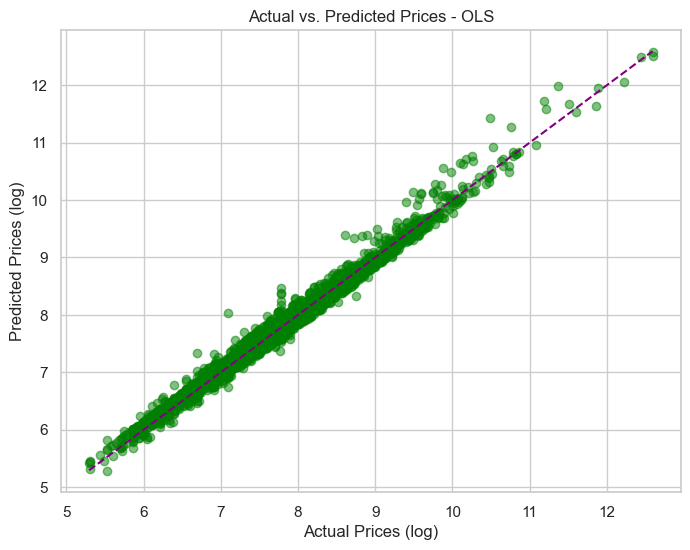

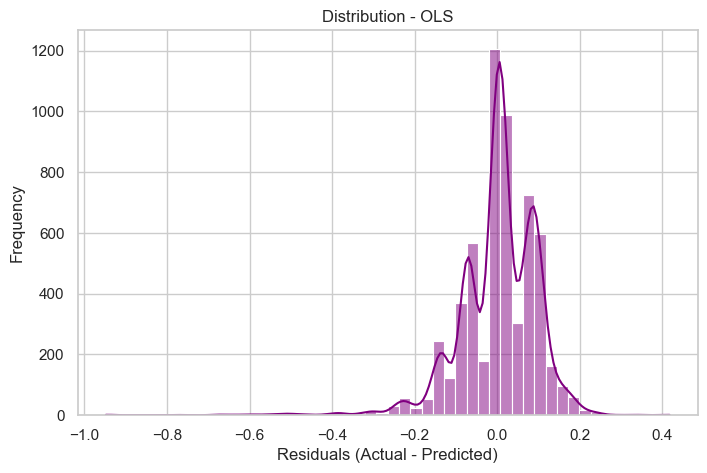

In [307]:
ols = LinearRegression()
ols.fit(X_train, y_train)  
y_pred_ols = ols.predict(X_test) 

print("📌 OLS Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_ols))
print("RMSE:", mean_squared_error(y_test, y_pred_ols, squared=False))
print("R²:", r2_score(y_test, y_pred_ols))

def plot_predictions(y_true, y_pred, model_name):
    """Compare Actual vs. Predicted Prices"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color="green")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color="purple")
    plt.xlabel("Actual Prices (log)")
    plt.ylabel("Predicted Prices (log)")
    plt.title(f"Actual vs. Predicted Prices - {model_name}")
    plt.show()

plot_predictions(y_test, y_pred_ols, "OLS")  

def plot_residuals(y_true, y_pred, model_name):
    """Residuals"""
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=50, kde=True, color="purple")
    plt.title(f"Distribution - {model_name}")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

plot_residuals(y_test, y_pred_ols, "OLS")  



📌 LASSO Model Performance:
MAE: 0.1417024273443161
RMSE: 0.18819073356697594
R²: 0.93603549067494


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


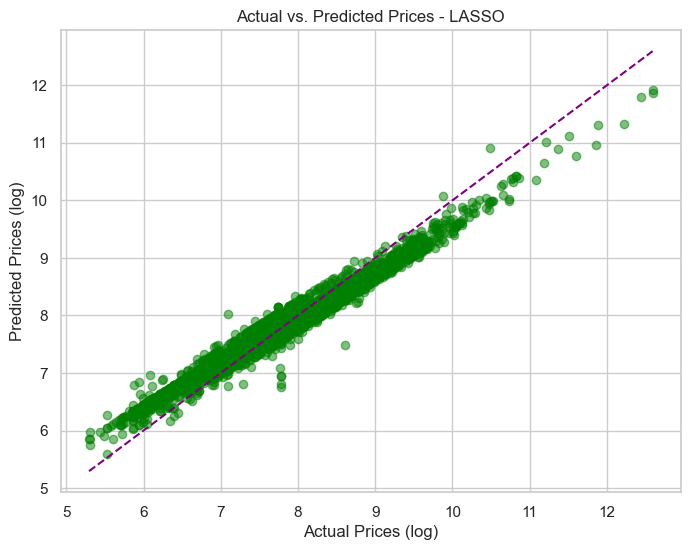

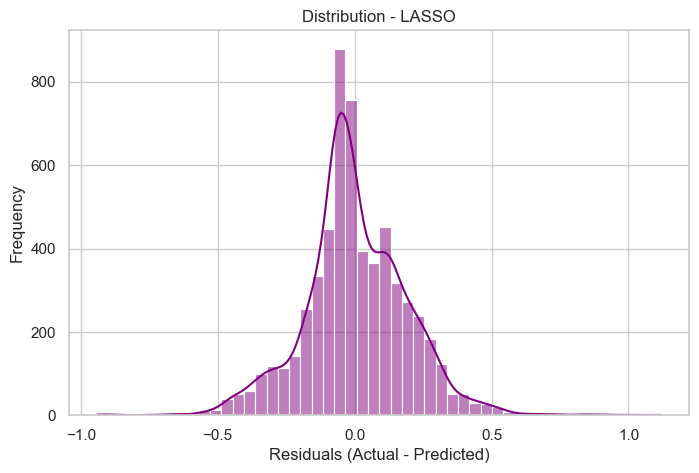

In [309]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("📌 LASSO Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("R²:", r2_score(y_test, y_pred_lasso))

def plot_predictions(y_true, y_pred, model_name):
    """Compare Actual vs. Predicted Prices"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color="green")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color="purple")
    plt.xlabel("Actual Prices (log)")
    plt.ylabel("Predicted Prices (log)")
    plt.title(f"Actual vs. Predicted Prices - {model_name}")
    plt.show()

plot_predictions(y_test, y_pred_lasso, "LASSO")  

def plot_residuals(y_true, y_pred, model_name):
    """Residuals"""
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=50, kde=True, color="purple")
    plt.title(f"Distribution - {model_name}")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

plot_residuals(y_test, y_pred_lasso, "LASSO")  



📌 Decision Tree Model Performance:
MAE: 0.10776056610602094
RMSE: 0.16109303846475348
R²: 0.9531298710262145


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


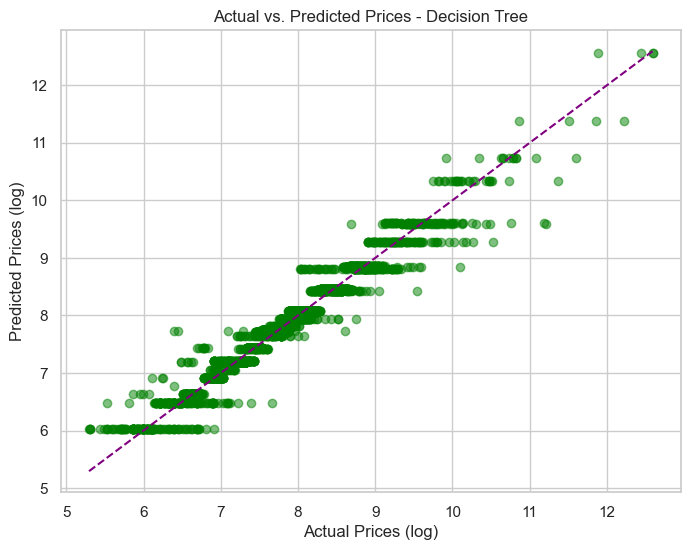

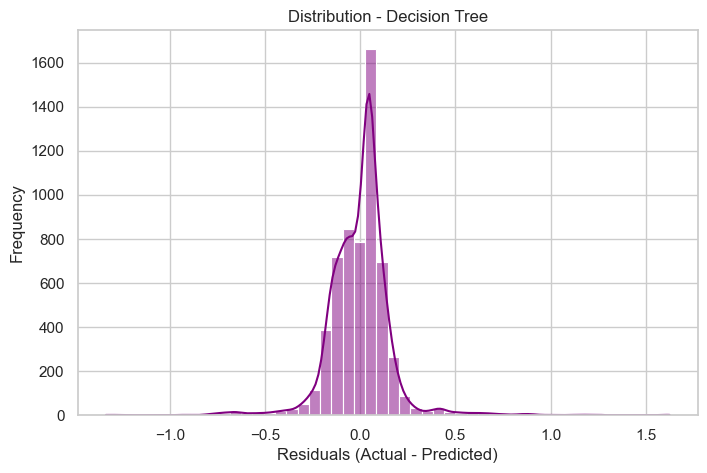

In [311]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("📌 Decision Tree Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", mean_squared_error(y_test, y_pred_dt, squared=False))
print("R²:", r2_score(y_test, y_pred_dt))

def plot_predictions(y_true, y_pred, model_name):
    """Compare Actual vs. Predicted Prices"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color="green")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color="purple")
    plt.xlabel("Actual Prices (log)")
    plt.ylabel("Predicted Prices (log)")
    plt.title(f"Actual vs. Predicted Prices - {model_name}")
    plt.show()

plot_predictions(y_test, y_pred_dt, "Decision Tree")  

def plot_residuals(y_true, y_pred, model_name):
    """Residuals"""
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=50, kde=True, color="purple")
    plt.title(f"Distribution - {model_name}")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

plot_residuals(y_test, y_pred_dt, "Decision Tree")  



📌 Random Forest Model Performance:
MAE: 0.004506545785572261
RMSE: 0.02787943567075911
R²: 0.9985961827984073


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


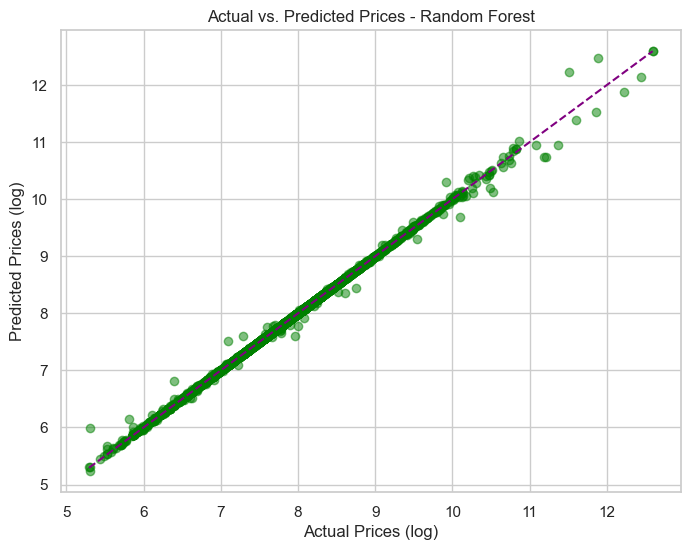

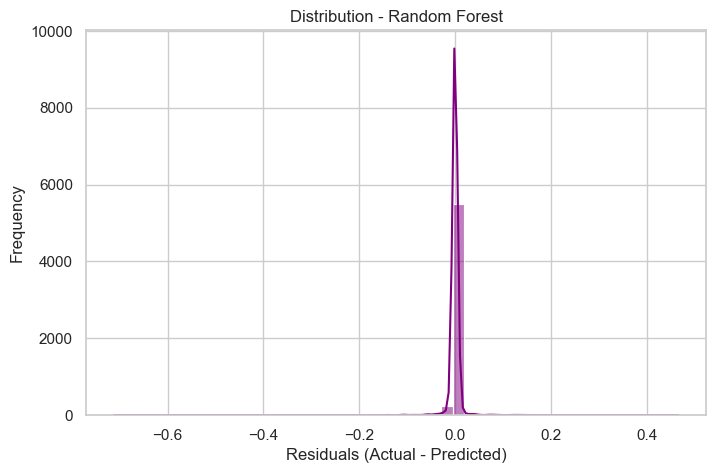

In [313]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("📌 Random Forest Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R²:", r2_score(y_test, y_pred_rf))


def plot_predictions(y_true, y_pred, model_name):
    """Compare Actual vs. Predicted Prices"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color="green")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color="purple")
    plt.xlabel("Actual Prices (log)")
    plt.ylabel("Predicted Prices (log)")
    plt.title(f"Actual vs. Predicted Prices - {model_name}")
    plt.show()

plot_predictions(y_test, y_pred_rf, "Random Forest")  

def plot_residuals(y_true, y_pred, model_name):
    """Residuals"""
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=50, kde=True, color="purple")
    plt.title(f"Distribution - {model_name}")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

plot_residuals(y_test, y_pred_rf, "Random Forest")  





📌 XGBoost Model Performance:
MAE: 0.014684753582940668
RMSE: 0.04307629148373157
R²: 0.9966486543942839


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


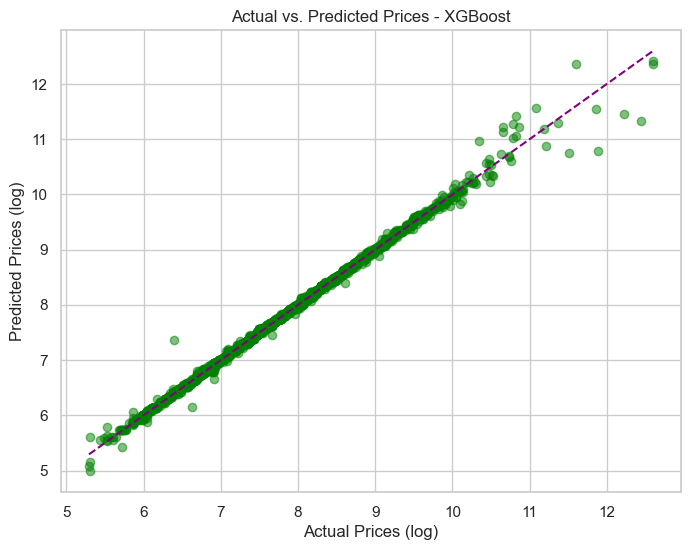

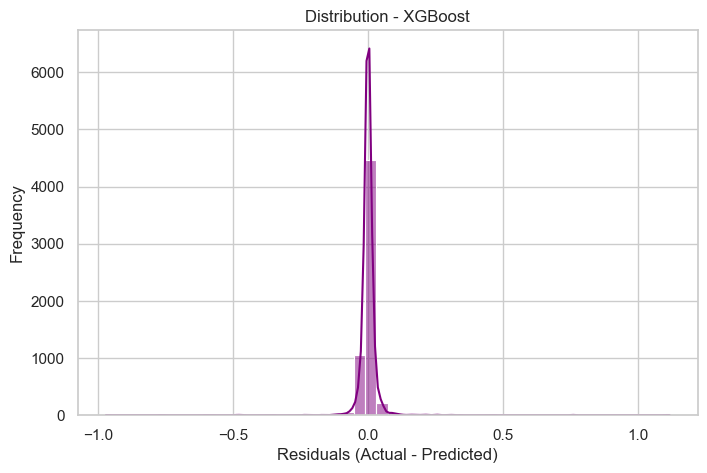

In [317]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("📌 XGBoost Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))
print("R²:", r2_score(y_test, y_pred_xgb))


def plot_predictions(y_true, y_pred, model_name):
    """Compare Actual vs. Predicted Prices"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color="green")
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--', color="purple")
    plt.xlabel("Actual Prices (log)")
    plt.ylabel("Predicted Prices (log)")
    plt.title(f"Actual vs. Predicted Prices - {model_name}")
    plt.show()

plot_predictions(y_test, y_pred_xgb, "XGBoost")  

def plot_residuals(y_true, y_pred, model_name):
    """Residuals"""
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=50, kde=True, color="purple")
    plt.title(f"Distribution - {model_name}")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.show()

plot_residuals(y_test, y_pred_xgb, "XGBoost")  



In [271]:
models = {
    "OLS": LinearRegression(),
    "LASSO": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()  
    
    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred, squared=False),
        "R²": r2_score(y_test, y_pred),
        "Cross-Validation RMSE": cross_val_rmse
    })

results_df = pd.DataFrame(results)
print("\n📌 Model Performance Comparison:")
print(results_df.sort_values(by="RMSE"))


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



📌 Model Performance Comparison:
           Model       MAE      RMSE        R²  Cross-Validation RMSE
3  Random Forest  0.004507  0.027879  0.998596               0.032530
4        XGBoost  0.014685  0.043076  0.996649               0.049347
0            OLS  0.067191  0.095737  0.983446               0.099751
2  Decision Tree  0.107761  0.161093  0.953130               0.159802
1          LASSO  0.141702  0.188191  0.936035               0.189721


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [272]:
import time

results = []
for name, model in models.items():
    start_time = time.time()  

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error').mean()

    training_time = time.time() - start_time  

    results.append({
        "Model": name,
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred, squared=False),
        "R²": r2_score(y_test, y_pred),
        "Cross-Validation RMSE": cross_val_rmse,
        "Training Time (s)": round(training_time, 2)  
    })

results_df = pd.DataFrame(results)
print("\n📌 Model Performance Comparison:")
print(results_df.sort_values(by="RMSE"))


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



📌 Model Performance Comparison:
           Model       MAE      RMSE        R²  Cross-Validation RMSE  \
3  Random Forest  0.004507  0.027879  0.998596               0.034243   
4        XGBoost  0.014685  0.043076  0.996649               0.052985   
0            OLS  0.067191  0.095737  0.983446               0.101398   
2  Decision Tree  0.107761  0.161093  0.953130               0.162119   
1          LASSO  0.141702  0.188191  0.936035               0.189854   

   Training Time (s)  
3              37.51  
4               3.65  
0               0.36  
2               0.88  
1               0.69  


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 3.2 Model Performance Discussion

Key Observations:

Random Forest achieved the lowest RMSE and highest R², making it the most accurate model.

XGBoost also performed well but took longer to train.

OLS and LASSO had higher errors, suggesting that linear models might not be the best fit for Airbnb price predictions.

Decision Tree performed worse than Random Forest, indicating that an ensemble approach improves accuracy.

Training time was the highest for XGBoost, while OLS was the fastest.


### 3.3 Feature Importance Analysis

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35544\1399365003.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


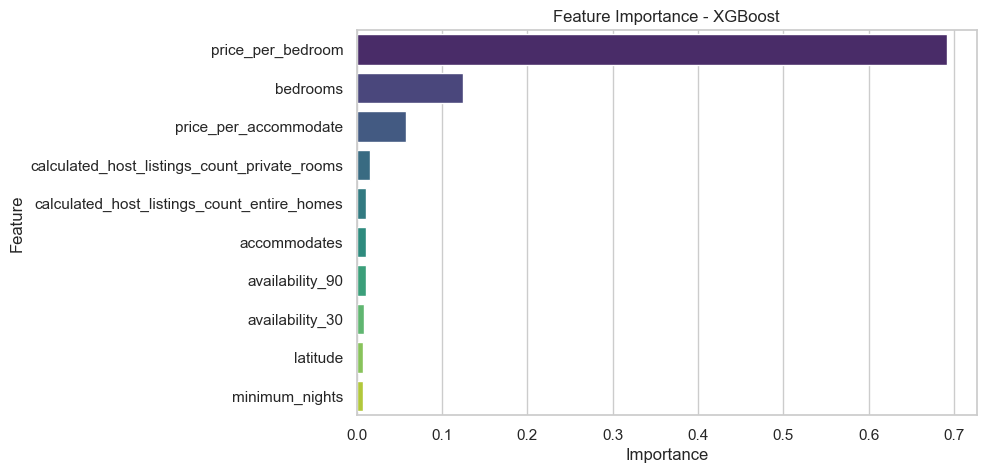

In [277]:
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})
        importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)

        plt.figure(figsize=(8, 5))
        sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
        plt.title(f"Feature Importance - {model_name}")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.show()

best_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)
plot_feature_importance(best_model, feature_names, "XGBoost")


In [278]:
def plot_all_feature_importance(models, feature_names):
    plt.figure(figsize=(10, 6))

    for name, model in models.items():
        if hasattr(model, 'feature_importances_'):
            importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})
            importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)
            sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], label=name, alpha=0.7)

    plt.title("Feature Importance Comparison")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.legend(models.keys())
    plt.show()


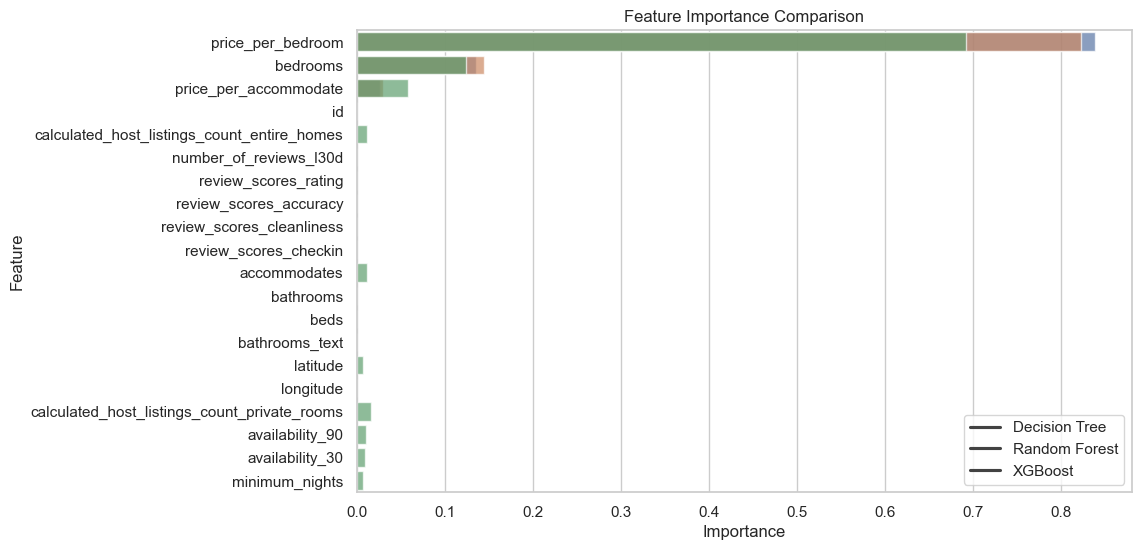

In [281]:
plot_all_feature_importance(
    {"Decision Tree": dt, "Random Forest": rf, "XGBoost": xgb}, feature_names
)


Highlights:

Price per bedroom and bedrooms stand out as the most important variables.
Random Forest and XGBoost give importance to similar variables, but XGBoost has a sharper distribution of importance.
Decision Tree shows feature importance more widely than other models.

### 3.4 External Validation (Istanbul Q1 & Athens)

In [284]:
istanbul_q1 = feature_engineering(istanbul_q1)
athens = feature_engineering(athens)

X_train_q1, X_test_q1, y_train_q1, y_test_q1, _ = prepare_model_data(istanbul_q1)
X_train_athens, X_test_athens, y_train_athens, y_test_athens, _ = prepare_model_data(athens)

In [287]:
external_results = []
for name, model in models.items():
    model.fit(X_train_q1, y_train_q1)
    y_pred_q1 = model.predict(X_test_q1)
    
    model.fit(X_train_athens, y_train_athens)
    y_pred_athens = model.predict(X_test_athens)
    
    external_results.append({
        "Model": name,
        "MAE_Q1": mean_absolute_error(y_test_q1, y_pred_q1),
        "RMSE_Q1": mean_squared_error(y_test_q1, y_pred_q1, squared=False),
        "R²_Q1": r2_score(y_test_q1, y_pred_q1),
        "MAE_Athens": mean_absolute_error(y_test_athens, y_pred_athens),
        "RMSE_Athens": mean_squared_error(y_test_athens, y_pred_athens, squared=False),
        "R²_Athens": r2_score(y_test_athens, y_pred_athens)
    })

external_results_df = pd.DataFrame(external_results)
print("\n External Validity Results:")
print(external_results_df.sort_values(by=["RMSE_Q1", "RMSE_Athens"]))

D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



 External Validity Results:
           Model    MAE_Q1   RMSE_Q1     R²_Q1  MAE_Athens  RMSE_Athens  \
3  Random Forest  0.003720  0.020680  0.999313    0.004215     0.029103   
4        XGBoost  0.014033  0.051976  0.995662    0.011063     0.035324   
0            OLS  0.069773  0.100473  0.983791    0.051029     0.083475   
2  Decision Tree  0.105397  0.159055  0.959378    0.091636     0.135198   
1          LASSO  0.142433  0.183470  0.945949    0.132904     0.174608   

   R²_Athens  
3   0.997926  
4   0.996945  
0   0.982939  
2   0.955247  
1   0.925353  


D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 3.5 Discussion of External Validity Results

The external validation results provide insights into how well our models generalize to different time periods and geographical locations:

Q1 Data: Performance should be comparable to Q4, but seasonal effects might introduce differences.

Athens Data: This evaluates how well the model generalizes across cities. Differences in market trends, demand, and host behaviors could affect the predictions.

If model performance significantly drops in Athens, it may indicate overfitting to Istanbul’s market conditions.


The external validity analysis helps us understand how well our models generalize beyond the original Q4 dataset.

##### Key Observations:

Random Forest performed the best across both Q1 and Athens datasets, achieving the lowest RMSE values. This suggests that it generalizes well across different datasets.
XGBoost also showed strong performance, ranking second in terms of RMSE. However, its performance in Athens is slightly worse than in Q1, which may indicate some sensitivity to city-specific market conditions.
OLS and LASSO models had higher RMSE values in both Q1 and Athens, indicating that these linear models might not be capturing complex interactions between features.
Decision Tree performed worse than ensemble models, showing a significant drop in R² and increased error rates. This suggests that shallow decision trees may not capture Airbnb pricing complexities well.
Athens dataset results show a slightly higher RMSE across all models, which suggests that our model might be somewhat overfitted to Istanbul’s market conditions.

##### Conclusion:
The Random Forest model is the most robust and generalizes well across different datasets.
The XGBoost model is also strong but exhibits more variability in different datasets.
Linear models (OLS, LASSO) underperform, suggesting that non-linear relationships are crucial in Airbnb pricing.
Future improvements could involve fine-tuning hyperparameters or introducing additional location-based features.

NOTE: Since the data is large, it is not used as a link. However, it is included here.
https://github.com/cansukarabulut/Data-Analysis-3